In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


**Task 1 : Read the dataset and do data pre-processing**

In [ ]:
# Task 1 : Read the dataset and do data pre-processing

In [ ]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.shape

(200, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: >

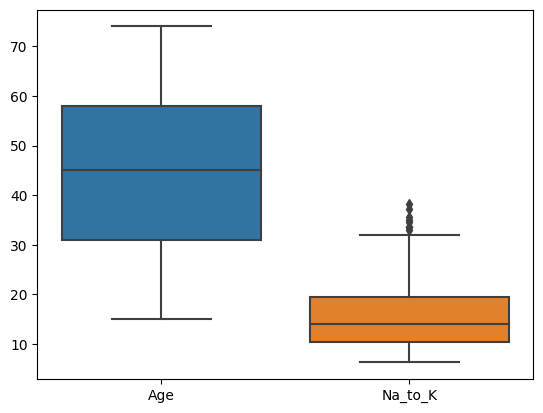

In [ ]:
# sns.boxplot(df['Na_to_K'])
sns.boxplot(df)

In [ ]:
# Na_to_K contains outliers
## Replace outliers using median method
q1 = df['Na_to_K'].quantile(.25)
q3 = df['Na_to_K'].quantile(.75)
IQR = q3 - q1
IQR

8.9345

In [ ]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [ ]:
df.median()

<ipython-input-106-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

In [ ]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,13.9365,df['Na_to_K'])

<Axes: >

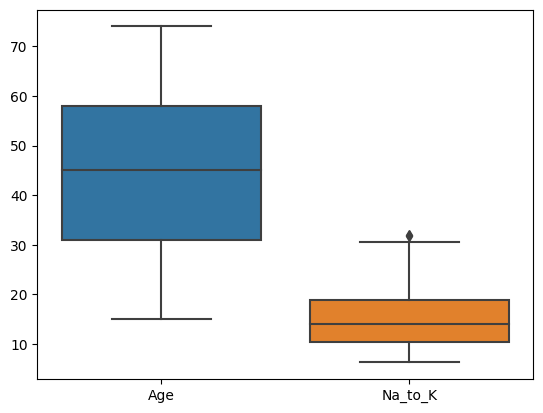

In [ ]:
sns.boxplot(df)

<Axes: xlabel='Drug', ylabel='count'>

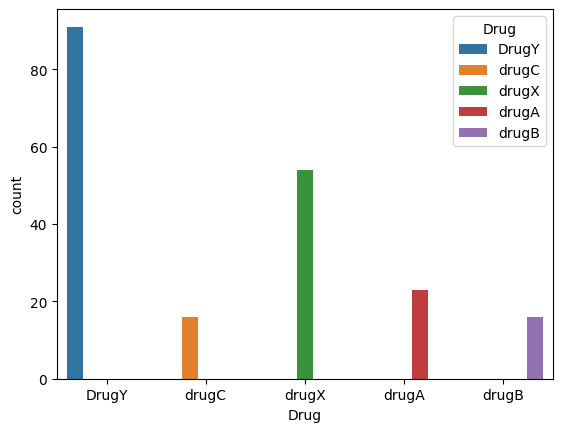

In [ ]:
sns.countplot(x='Drug',data=df,hue='Drug')

<Axes: xlabel='Na_to_K', ylabel='Count'>

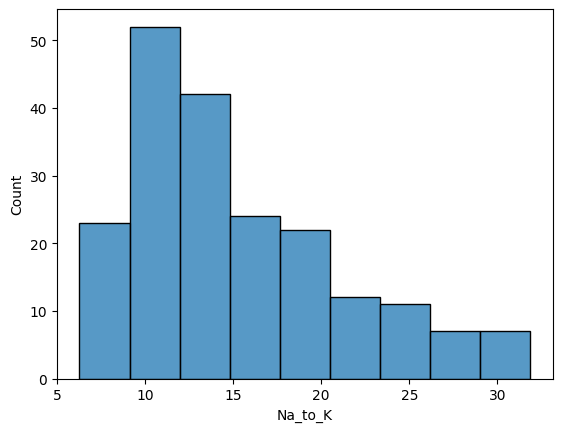

In [ ]:
sns.histplot(x='Na_to_K', data=df)

In [ ]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df['Drug'] = label_encoder.fit_transform(df['Drug'])
print(df.head())

   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     0
1   47    1   1            0   13.093     3
2   47    1   1            0   10.114     3
3   28    0   2            0    7.798     4
4   61    0   1            0   18.043     0


In [ ]:
# Scale numerical variables

scaler = StandardScaler()
df[['Age', 'Na_to_K']] = scaler.fit_transform(df[['Age', 'Na_to_K']])

In [ ]:
# Separate features and labels

x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

In [ ]:
# Split the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_test.shape)

(160, 5)
(40,)


**Task 2 : Bauild the ANN model with (input layer, min 3 hidden layers & output layer)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Define the model architecture

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(5,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
x = df.iloc[:,0:5]
y = df.iloc[:,5:]
print(x)
print(y)

          Age  Sex  BP  Cholesterol   Na_to_K
0   -1.291591    0   0            0  1.667108
1    0.162699    1   1            0 -0.353541
2    0.162699    1   1            0 -0.844449
3   -0.988614    0   2            0 -1.226101
4    1.011034    0   1            0  0.462167
..        ...  ...  ..          ...       ...
195  0.708057    0   1            0 -0.605010
196 -1.715759    1   1            0 -0.532667
197  0.465676    1   2            0 -0.880703
198 -1.291591    1   2            1 -0.200781
199 -0.261469    0   1            1 -0.640934

[200 rows x 5 columns]
     Drug
0       0
1       3
2       3
3       4
4       0
..    ...
195     3
196     3
197     4
198     4
199     4

[200 rows x 1 columns]


In [ ]:
# Compile the model

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
model.fit(X_train, y_train_encoded, epochs=20, batch_size=20, validation_data=(X_test, y_test_encoded))

Epoch 1/20
8/8 [==============================] - 1s 23ms/step - loss: 1.5097 - accuracy: 0.4688 - val_loss: 1.4162 - val_accuracy: 0.4250
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 1.2958 - accuracy: 0.5813 - val_loss: 1.2088 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 1.0352 - accuracy: 0.6875 - val_loss: 0.9961 - val_accuracy: 0.5750
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 0.8026 - accuracy: 0.7063 - val_loss: 0.8488 - val_accuracy: 0.6000
Epoch 5/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6291 - accuracy: 0.7563 - val_loss: 0.7130 - val_accuracy: 0.7250
Epoch 6/20
8/8 [==============================] - 0s 5ms/step - loss: 0.5073 - accuracy: 0.8500 - val_loss: 0.6326 - val_accuracy: 0.8000
Epoch 7/20
8/8 [==============================] - 0s 5ms/step - loss: 0.4056 - accuracy: 0.9125 - val_loss: 0.5709 - val_accuracy: 0.8250
Epoch 8/20
8/8 [=================

In [ ]:
y_pred = model.predict(x_test)
y_pred

2/2 [==============================] - 0s 4ms/step


array([[1.34151618e-04, 3.19220329e-04, 5.06109039e-08, 2.15125773e-02,
        9.78033960e-01],
       [9.88666415e-01, 1.10616516e-02, 6.07707116e-05, 1.67387683e-04,
        4.35690126e-05],
       [2.48721904e-07, 2.73494879e-06, 1.29595969e-11, 1.83520280e-03,
        9.98161793e-01],
       [6.58817589e-04, 2.48121712e-02, 2.29883799e-03, 7.89929211e-01,
        1.82300985e-01],
       [7.15113103e-01, 5.93096367e-04, 1.09803123e-05, 4.05591447e-03,
        2.80226856e-01],
       [9.99784470e-01, 2.40138706e-05, 1.83876909e-04, 3.88109038e-06,
        3.77563356e-06],
       [9.99999940e-01, 1.58993751e-09, 1.16259979e-09, 4.93341409e-11,
        3.57844254e-10],
       [1.71912350e-02, 3.16705642e-04, 7.09132621e-07, 1.09738810e-02,
        9.71517444e-01],
       [3.50134104e-01, 5.94843030e-01, 3.92889827e-02, 1.08473329e-02,
        4.88670077e-03],
       [2.16123931e-06, 3.01982764e-05, 2.32106707e-08, 2.59591490e-02,
        9.74008560e-01],
       [2.63636990e-04, 9.7913

In [ ]:
comp = pd.DataFrame(y_test_encoded)  # Creating a dataframe
comp.columns = ['Actual Value']  # Changing the column name
comp

,Actual Value
0,4
1,0
2,4
3,3
4,0
5,0
6,0
7,4
8,1
9,4


In [ ]:
# Print the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                384       
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 5)                 165       
                                                                 
Total params: 19,205
Trainable params: 19,205
Non-trainable params: 0
_________________________________________________________________


**Task 3 : Test the model with random data**

In [ ]:
# Generate random data for testing

random_data = np.random.rand(1, 5)
random_data

array([[0.8548792 , 0.41381748, 0.46528828, 0.94314117, 0.54992022]])

In [ ]:
# Make predictions

predictions = model.predict(random_data)
predictions

1/1 [==============================] - 0s 53ms/step


array([[9.9998689e-01, 3.0921401e-06, 5.5528467e-06, 5.2878283e-07,
        3.9242123e-06]], dtype=float32)

In [ ]:
# Get the predicted drug class

predicted_class = np.argmax(predictions)

In [ ]:
# Print the predicted class

print("Predicted Drug Class :", predicted_class)

Predicted Drug Class : 0
